In [2]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
sns.set_style("darkgrid")
sns.set_context("paper")

# Import from the Raw Layer

In [5]:
# File paths
assessments_file_path = r"..\Raw\assessments.csv"
courses_file_path = r"..\Raw\courses.csv"
course_skill_mapping_file_path = r"..\Raw\course_skill_mapping.csv"
skills_file_path = r"..\Raw\skills.csv"
employee_skill_proficiency_file_path = r"..\Raw\employee_skill_proficiency.csv"
employees_file_path = r"..\Raw\employees.csv"

In [6]:
# Read the csv files using pandas
assessments_df = pd.read_csv(assessments_file_path)
courses_df = pd.read_csv(courses_file_path)
course_skill_df = pd.read_csv(course_skill_mapping_file_path)
skills_df = pd.read_csv(skills_file_path)
employee_skill_proficiency_df = pd.read_csv(employee_skill_proficiency_file_path)
employees_df = pd.read_csv(employees_file_path)

# PreProcessing and Exploratory Data Analysis

## Courses Data

In [7]:
courses_df.head()

,courseid,coursename,duration,description
1,Introduction to Data Science,4 weeks,Learn the basics of data science,including data analysis and visualization.
2,Machine Learning Basics,6 weeks,Understand the fundamentals of machine learnin...,NaN
3,Deep Learning with TensorFlow,8 weeks,A deep dive into deep learning concepts using ...,NaN
4,Statistical Analysis with R,5 weeks,Learn statistical methods and their applicatio...,NaN
5,Data Visualization with Python,3 weeks,Visualize data effectively using Python librar...,NaN


In [8]:
# Rename the columns 
courses_df.columns =["CourseName", "CourseDuration", "Description", "nan"]
courses_df.head()

,CourseName,CourseDuration,Description,nan
1,Introduction to Data Science,4 weeks,Learn the basics of data science,including data analysis and visualization.
2,Machine Learning Basics,6 weeks,Understand the fundamentals of machine learnin...,NaN
3,Deep Learning with TensorFlow,8 weeks,A deep dive into deep learning concepts using ...,NaN
4,Statistical Analysis with R,5 weeks,Learn statistical methods and their applicatio...,NaN
5,Data Visualization with Python,3 weeks,Visualize data effectively using Python librar...,NaN


In [9]:
# Drop the last column
courses_df = courses_df.drop(columns=["nan"])
courses_df.head()

,CourseName,CourseDuration,Description
1,Introduction to Data Science,4 weeks,Learn the basics of data science
2,Machine Learning Basics,6 weeks,Understand the fundamentals of machine learnin...
3,Deep Learning with TensorFlow,8 weeks,A deep dive into deep learning concepts using ...
4,Statistical Analysis with R,5 weeks,Learn statistical methods and their applicatio...
5,Data Visualization with Python,3 weeks,Visualize data effectively using Python librar...


In [10]:
# Rename the index to mark it as course ID.
courses_df["CourseID"] = courses_df.index
courses_df.index.name = ""
courses_df.head()

,CourseName,CourseDuration,Description,CourseID
,,,,
1,Introduction to Data Science,4 weeks,Learn the basics of data science,1
2,Machine Learning Basics,6 weeks,Understand the fundamentals of machine learnin...,2
3,Deep Learning with TensorFlow,8 weeks,A deep dive into deep learning concepts using ...,3
4,Statistical Analysis with R,5 weeks,Learn statistical methods and their applicatio...,4
5,Data Visualization with Python,3 weeks,Visualize data effectively using Python librar...,5


In [11]:
# Check the duplicates
courses_df.duplicated().any()

np.False_

In [12]:
# Change the course duration column to make it integer
courses_df["CourseDuration"] =  courses_df.CourseDuration.apply(lambda x : x.split()[0])
courses_df["CourseDuration"] = courses_df.CourseDuration.astype("int")
courses_df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 30 entries, 1 to 30
Data columns (total 4 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   CourseName      30 non-null     object
 1   CourseDuration  30 non-null     int64 
 2   Description     30 non-null     object
 3   CourseID        30 non-null     int64 
dtypes: int64(2), object(2)
memory usage: 1.2+ KB


In [13]:
courses_df.describe().T

,count,mean,std,min,25%,50%,75%,max
CourseDuration,30.0,5.0,2.034191,3.0,4.00,5.0,5.75,12.0
CourseID,30.0,15.5,8.803408,1.0,8.25,15.5,22.75,30.0


- The average course length is 5 weeks


Text(0.5, 1.0, 'Course Duration outliers check')

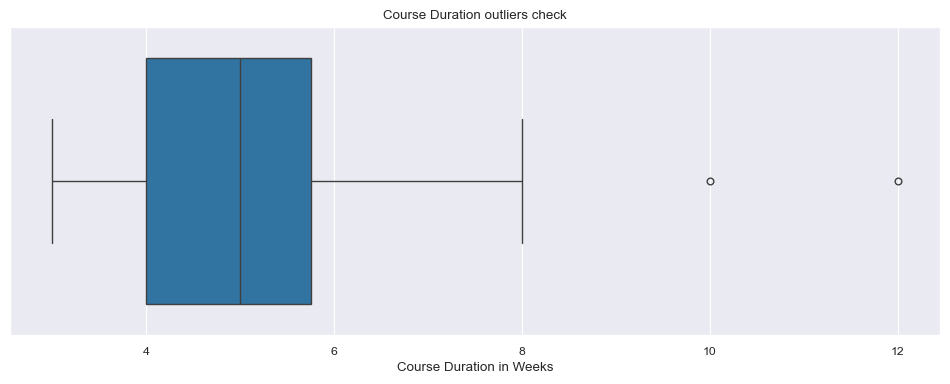

In [14]:
plt.figure(figsize = (12,4))

sns.boxplot(data = courses_df, x = "CourseDuration")
plt.xlabel("Course Duration in Weeks")
plt.title("Course Duration outliers check")

- A few courses are marked as outliers with their length being more than 8 weeks.

C:\Users\RishabhSaklani\AppData\Local\Temp\ipykernel_12452\566144850.py:3: UserWarning: Ignoring `palette` because no `hue` variable has been assigned.
  sns.histplot(data = courses_df, x = "CourseDuration", kde = True, bins = 10, palette = "ch:start=.2,rot=-.3")


Text(0.5, 1.0, 'Course Duration distribution')

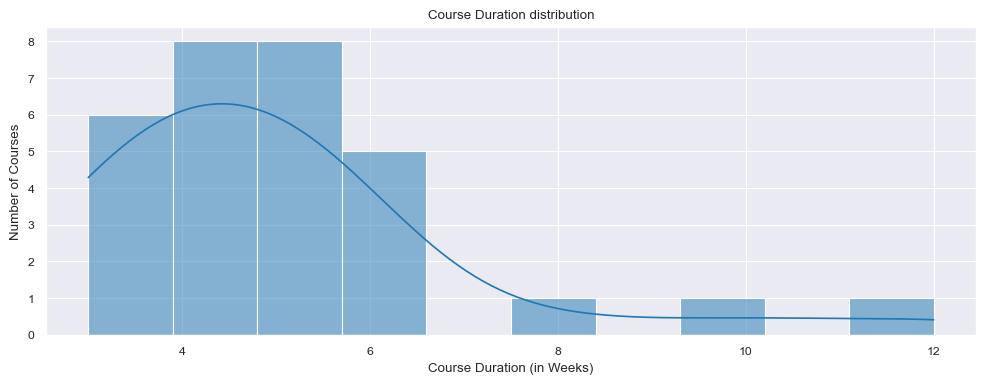

In [15]:
plt.figure(figsize = (12,4))

sns.histplot(data = courses_df, x = "CourseDuration", kde = True, bins = 10, palette = "ch:start=.2,rot=-.3")
plt.xlabel("Course Duration (in Weeks)")
plt.ylabel("Number of Courses")
plt.title("Course Duration distribution")

- The distribution is right skewed with most of the courses having a short span. 

In [16]:
courses_df.columns

Index(['CourseName', 'CourseDuration', 'Description', 'CourseID'], dtype='object')

In [17]:
courses_df = courses_df[["CourseID", "CourseName", "CourseDuration", "Description"]]
courses_df.sample(10)

,CourseID,CourseName,CourseDuration,Description
,,,,
9,9,Data Ethics and Privacy,3,Understand the ethical implications and privac...
22,22,JavaScript: The Good Parts,3,Deep understanding of JavaScript and its best ...
15,15,Containerization with Docker,3,Learn how to use Docker to containerize applic...
3,3,Deep Learning with TensorFlow,8,A deep dive into deep learning concepts using ...
23,23,Building Web Apps with React,5,Create dynamic web applications using React.js.
16,16,CI/CD Pipeline Implementation,5,Understand how to implement CI/CD pipelines in...
18,18,Agile Project Management,3,Explore the principles and practices of Agile ...
4,4,Statistical Analysis with R,5,Learn statistical methods and their applicatio...
29,29,APIs and Microservices,4,Explore the design and development of APIs and...


## Skills Data 

In [18]:
skills_df.head()

,skillid,skillname,category
0,1,Data Analysis,Data Science
1,2,Machine Learning,Data Science
2,3,Statistical Analysis,Data Science
3,4,Data Visualization,Data Science
4,5,Deep Learning,Data Science


In [19]:
skills_df = skills_df.set_index("skillid")
skills_df.head()

,skillname,category
skillid,,
1,Data Analysis,Data Science
2,Machine Learning,Data Science
3,Statistical Analysis,Data Science
4,Data Visualization,Data Science
5,Deep Learning,Data Science


In [20]:
# check null 
skills_df.isnull().sum()

skillname    0
category     0
dtype: int64

In [21]:
skills_df.duplicated().any()

np.False_

In [22]:
skills_df.sample(10)

,skillname,category
skillid,,
37,Database Management Systems,Full Stack
31,HTML & CSS,Full Stack
34,Node.js,Full Stack
25,Serverless Architecture,TechOps
16,Cloud Computing,TechOps
21,CI/CD Pipeline Implementation,TechOps
42,Angular,Full Stack
49,Deployment Strategies,Full Stack
10,Time Series Analysis,Data Science


C:\Users\RishabhSaklani\AppData\Local\Temp\ipykernel_12452\2859084106.py:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data = skills_df, y = "category", palette = "ch:start=.2,rot=-.3")


Text(0.5, 0, 'Course Count')

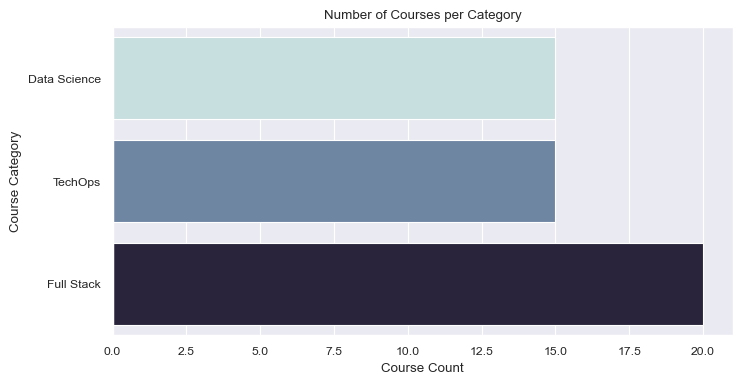

In [23]:
# Count plot for courses type 
plt.figure(figsize = (8,4))

sns.countplot(data = skills_df, y = "category", palette = "ch:start=.2,rot=-.3")
plt.title("Number of Courses per Category")
plt.ylabel("Course Category")
plt.xlabel("Course Count")

In [24]:
skills_df = skills_df.reset_index()

## Course Skill Mapping

In [25]:
course_skill_df.head()

,courseid,skillid
0,1,1 -- Introduction to Data Science -> Data Ana...
1,1,2 -- Introduction to Data Science -> Machine ...
2,1,4 -- Introduction to Data Science -> Data Vis...
3,1,6 -- Introduction to Data Science -> Data Sci...
4,1,8 -- Introduction to Data Science -> Introduc...


In [26]:
# check for null and duplicated
course_skill_df.isnull().sum()

courseid    0
skillid     0
dtype: int64

In [27]:
course_skill_df.duplicated().any()

np.False_

In [28]:
course_skill_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 66 entries, 0 to 65
Data columns (total 2 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   courseid  66 non-null     int64 
 1   skillid   66 non-null     object
dtypes: int64(1), object(1)
memory usage: 1.2+ KB


In [29]:
# Clean the skillid column
course_skill_df["skillid"] = course_skill_df.skillid.apply(lambda x : x.replace("--" , ""))
course_skill_df["skillid"] = course_skill_df.skillid.apply(lambda x : x.replace("->" , ""))
course_skill_df["skillid"] = course_skill_df.skillid.apply(lambda x : x.split()[0]).astype("int")
course_skill_df.sample(10)

,courseid,skillid
40,14,14
34,11,11
3,1,6
19,5,4
28,8,8
61,27,36
58,25,35
52,21,23
36,12,17
60,26,31


## Employee Skill Proficiency Data

In [30]:
employee_skill_proficiency_df.head(10)

,empid,skillid,proficiency
0,1,1,5 -- Data Analysis
1,1,2,4 -- Machine Learning
2,1,3,3 -- Statistical Analysis
3,1,4,5 -- Data Visualization
4,1,5,4 -- Deep Learning
5,2,1,4 -- Data Analysis
6,2,2,5 -- Machine Learning
7,2,3,4 -- Statistical Analysis
8,2,4,3 -- Data Visualization
9,2,11,5 -- Data Mining


In [31]:
employee_skill_proficiency_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 428 entries, 0 to 427
Data columns (total 3 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   empid        428 non-null    object
 1   skillid      428 non-null    object
 2   proficiency  428 non-null    object
dtypes: object(3)
memory usage: 10.2+ KB


In [32]:
employee_skill_proficiency_df.duplicated().any()

np.False_

In [33]:
employee_skill_proficiency_df.sample(10)

,empid,skillid,proficiency
150,34,2,2 -- Machine Learning
40,9,1,4 -- Data Analysis
403,6,32,2 -- JavaScript
279,6,16,3 -- Cloud Computing
354,47,31,3 -- HTML/CSS
420,12,33,2 -- Node.js
31,7,2,3 -- Machine Learning
248,37,20,1 -- Containerization
214,26,19,3 -- Network Security
174,42,3,1 -- Statistical Analysis


In [34]:
# Invalid entry
employee_skill_proficiency_df.drop(index = 260, inplace = True)

In [35]:
employee_skill_proficiency_df["proficiency"] = employee_skill_proficiency_df.proficiency.apply(lambda x : x.split("--")[0].strip()).astype("int")

Text(0.5, 0, 'Skill Proficiency')

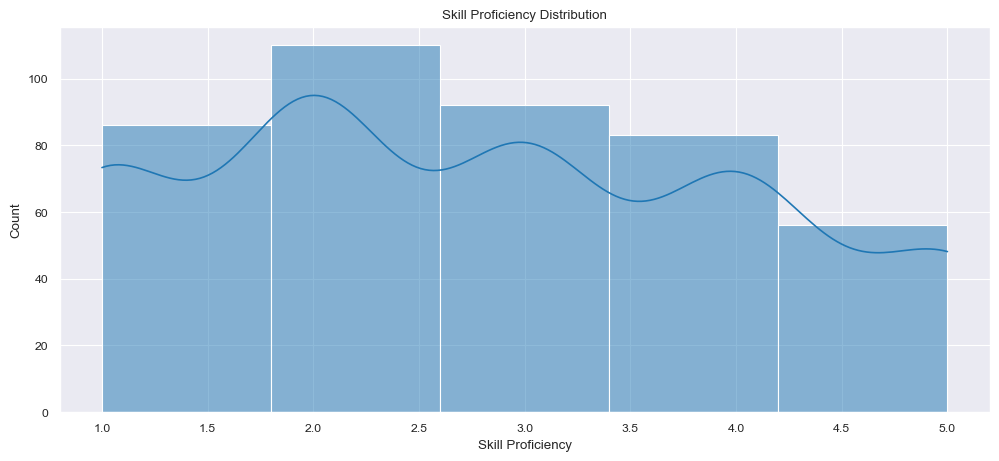

In [36]:
plt.figure(figsize = (12,5))

sns.histplot(data = employee_skill_proficiency_df, x = "proficiency", kde = True, bins = 5)
plt.title("Skill Proficiency Distribution")
plt.xlabel("Skill Proficiency")

## Assessments Data

In [37]:
assessments_df.sample(10)

,assessmentid,empid,courseid,skillid,assessment_score,max_score,due_date,test_taken,test_completed
70,38,15.0,16,30,80.0,100,2024-12-31,2024-11-12,2024-11-27
82,50,8.0,8,16,95.0,100,2024-12-31,2024-11-03,2024-11-18
87,55,13.0,13,28,88.0,100,2024-12-31,2024-11-17,2024-12-02
74,42,19.0,20,22,93.0,100,2024-12-31,2024-11-16,2024-12-01
43,11,7.0,4,8,88.0,100,2024-12-31,2024-11-03,2024-11-18
52,20,15.0,10,22,88.0,100,2024-12-31,2024-11-01,2024-11-15
83,51,9.0,9,19,82.0,100,2024-12-31,2024-11-07,2024-11-23
47,15,10.0,6,12,65.0,100,2024-12-31,2024-11-05,2024-11-20
61,29,6.0,7,14,79.0,100,2024-12-31,2024-11-03,2024-11-18
10,11,7.0,4,8,NaN,100,NaN,NaN,NaN


In [38]:
assessments_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 94 entries, 0 to 93
Data columns (total 9 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   assessmentid      94 non-null     int64  
 1   empid             84 non-null     float64
 2   courseid          94 non-null     int64  
 3   skillid           94 non-null     int64  
 4   assessment_score  80 non-null     float64
 5   max_score         94 non-null     int64  
 6   due_date          80 non-null     object 
 7   test_taken        80 non-null     object 
 8   test_completed    80 non-null     object 
dtypes: float64(2), int64(4), object(3)
memory usage: 6.7+ KB


In [39]:
assessments_df.isnull().sum()

assessmentid         0
empid               10
courseid             0
skillid              0
assessment_score    14
max_score            0
due_date            14
test_taken          14
test_completed      14
dtype: int64

In [40]:
assessments_df.duplicated().sum()

np.int64(6)

In [41]:
# Drop duplicates
assessments_df = assessments_df.drop_duplicates()

# Drop null values where empID are null

assessments_df = assessments_df.dropna()

In [42]:
assessments_df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 74 entries, 0 to 93
Data columns (total 9 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   assessmentid      74 non-null     int64  
 1   empid             74 non-null     float64
 2   courseid          74 non-null     int64  
 3   skillid           74 non-null     int64  
 4   assessment_score  74 non-null     float64
 5   max_score         74 non-null     int64  
 6   due_date          74 non-null     object 
 7   test_taken        74 non-null     object 
 8   test_completed    74 non-null     object 
dtypes: float64(2), int64(4), object(3)
memory usage: 5.8+ KB


Text(0.5, 0, 'Assessment Score')

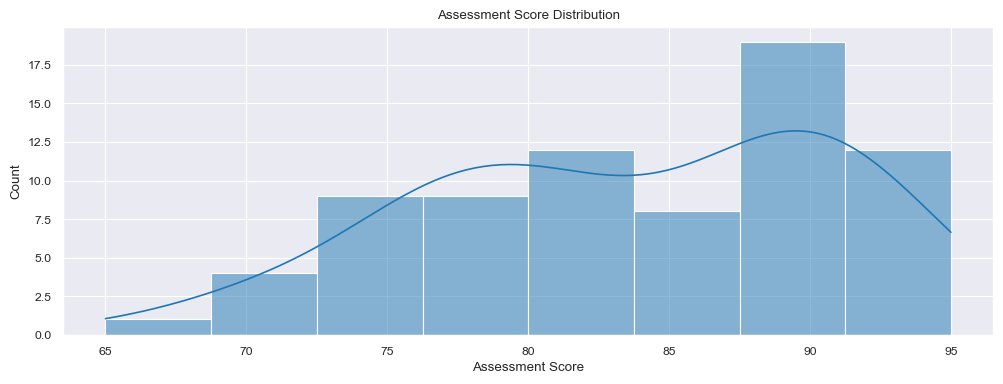

In [43]:
# assessment scores distribution
plt.figure(figsize = (12,4))

sns.histplot(data = assessments_df, x = "assessment_score", kde = True)
plt.title("Assessment Score Distribution")
plt.xlabel("Assessment Score")

Text(0.5, 0, 'Assessment Score')

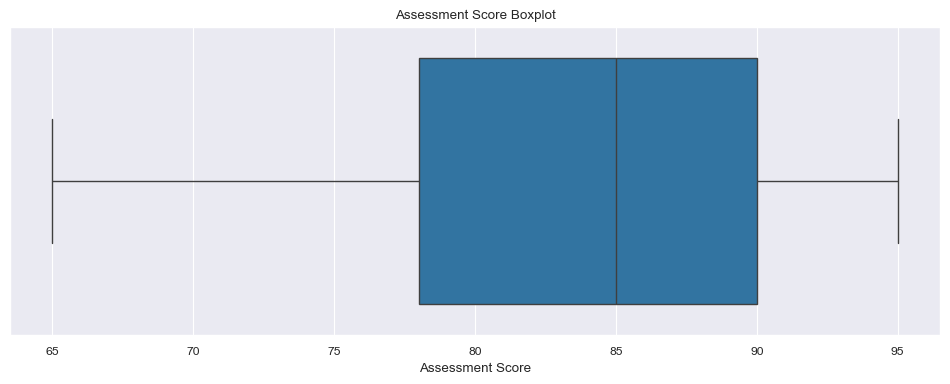

In [44]:
# Check for outliers 
plt.figure(figsize = (12,4))

sns.boxplot(data = assessments_df, x = "assessment_score")
plt.title("Assessment Score Boxplot")
plt.xlabel("Assessment Score")

## Employees Data

In [45]:
employees_df.head()

,empid,empname,desgination,experience,birth_date,hire_date,salary,gender,activestatus,created_at
0,1,Alice Johnson,Software Engineer,3 years,5/15/1990,6/1/2021,75000,Female,Active,6/1/2021 9:00
1,2,Bob Smith,Sr. Software Engineer,5 years,8/22/1988,3/15/2019,90000,Male,Active,3/15/2019 10:00
2,3,Charlie Brown,Solutions Enabler,4 years,1/10/1992,7/20/2020,85000,Male,Inactive,7/20/2020 11:00
3,4,Diana Prince,Solutions Consultant,6 years,12/30/1985,4/10/2018,110000,Female,Active,4/10/2018 12:00
4,5,Evelyn Harper,Principal Architect,10 years,9/14/1982,11/11/2015,150000,Female,Active,11/11/2015 13:00


In [46]:
employees_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 10 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   empid         150 non-null    int64 
 1   empname       150 non-null    object
 2   desgination   150 non-null    object
 3   experience    150 non-null    object
 4   birth_date    150 non-null    object
 5   hire_date     150 non-null    object
 6   salary        150 non-null    int64 
 7   gender        150 non-null    object
 8   activestatus  150 non-null    object
 9   created_at    150 non-null    object
dtypes: int64(2), object(8)
memory usage: 11.8+ KB


In [47]:
employees_df.isnull().sum()

empid           0
empname         0
desgination     0
experience      0
birth_date      0
hire_date       0
salary          0
gender          0
activestatus    0
created_at      0
dtype: int64

In [48]:
employees_df.duplicated().any()

np.False_

In [49]:
employees_df.columns = ['empid', 'empname', 'designation', 'experience', 'birth_date',
       'hire_date', 'salary', 'gender', 'activestatus', 'created_at']

In [50]:
# Change the experience column to integer
employees_df["experience"] = employees_df.experience.apply(lambda x : x.split()[0]).astype("int")

In [51]:
# change datetime columns 
employees_df["birth_date"] = pd.to_datetime(employees_df.birth_date)
employees_df["hire_date"] = pd.to_datetime(employees_df.hire_date)
employees_df["created_at"] = pd.to_datetime(employees_df.created_at)

C:\Users\RishabhSaklani\AppData\Local\Temp\ipykernel_12452\2224996494.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data = employees_df,  x = "gender", palette = "ch:start=.2,rot=-.3")


Text(0, 0.5, 'Employee Count')

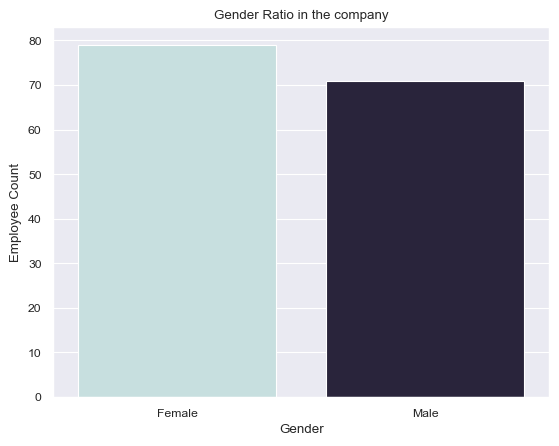

In [52]:
# Check male female ratio

sns.countplot(data = employees_df,  x = "gender", palette = "ch:start=.2,rot=-.3")
plt.title("Gender Ratio in the company")
plt.xlabel("Gender")
plt.ylabel("Employee Count")

C:\Users\RishabhSaklani\AppData\Local\Temp\ipykernel_12452\507487060.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data = employees_df,  x = "designation", palette = "ch:start=.2,rot=-.3")


Text(0, 0.5, 'Employee Count')

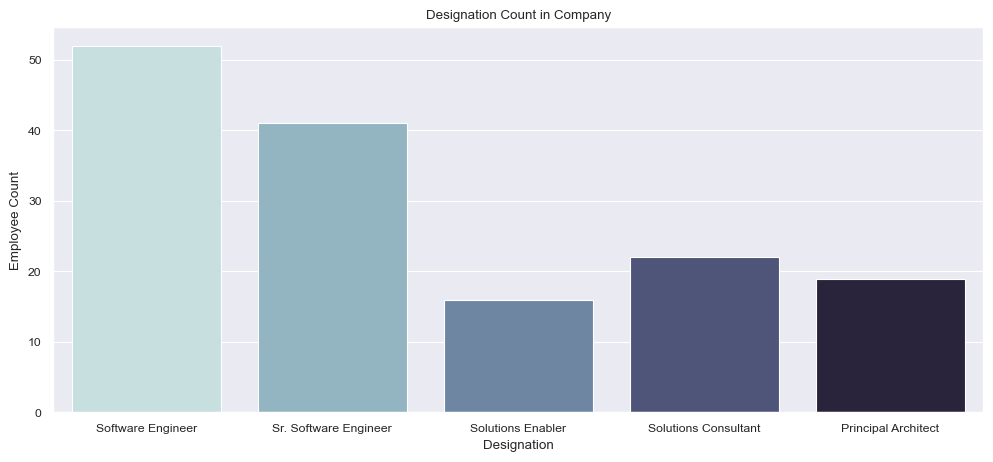

In [53]:
plt.figure(figsize = (12,5))

sns.countplot(data = employees_df,  x = "designation", palette = "ch:start=.2,rot=-.3")
plt.title("Designation Count in Company")
plt.xlabel("Designation")
plt.ylabel("Employee Count")

In [54]:
employees_df.columns

Index(['empid', 'empname', 'designation', 'experience', 'birth_date',
       'hire_date', 'salary', 'gender', 'activestatus', 'created_at'],
      dtype='object')

Text(0, 0.5, 'Salary (per month)')

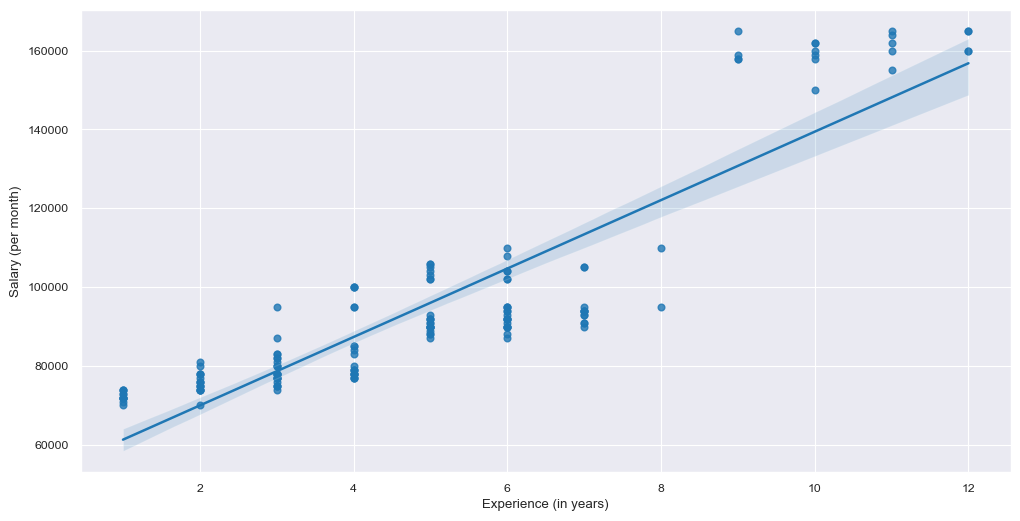

In [55]:
# Experience and salary relation

plt.figure(figsize = (12,6))

sns.regplot(data = employees_df, x = "experience", y = "salary")
plt.xlabel("Experience (in years)")
plt.ylabel("Salary (per month)")

### Push the data in the mart folder as staging files

In [56]:
assessments_df.to_csv(path_or_buf = r"./mart/stg_assessments.csv", index=False)
courses_df.to_csv(path_or_buf = r"./mart/stg_courses.csv", index=False)
course_skill_df.to_csv(path_or_buf = r"./mart/stg_courses_skills.csv", index=False)
employees_df.to_csv(path_or_buf = r"./mart/stg_employees.csv", index=False)
employee_skill_proficiency_df.to_csv(path_or_buf = r"./mart/stg_employee_skill_proficiency.csv", index=False)
skills_df.to_csv(path_or_buf = r"./mart/stg_skills.csv", index=False)